In [1]:
%cd ./vis

c:\Users\agata\Desktop\UNI\MSC\BIAM\Framsticks\framspy\frams-gecco-2024\vis


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import interpret


In [2]:
groupped_results = interpret.import_from_dir("../results/dpga/", lambda args: args["meta"] + " - F" + args["genformat"])
results_df = interpret.convert_to_dataframe(groupped_results)

In [3]:
groupped1 = interpret.import_from_dir("../results/dpga_defined/", lambda args: args["meta"] + " - F" + args["genformat"])
res2 = interpret.convert_to_dataframe(groupped1)

In [4]:
res2["group"] = "DPGA - F0 - predefined"

In [5]:
import pandas as pd
results_df = pd.concat([results_df, res2], ignore_index=True)

In [6]:
results_df

,group,run_idx,gen,nevals,avg,stddev,min,max,m_strength,time_s
0,DPGA - F0,0,0,15,0.000000,0.000000,0.000000,0.000000,1.0,733.271533
1,DPGA - F0,0,1,31,0.000001,0.000004,0.000000,0.000017,1.0,733.271533
2,DPGA - F0,0,2,32,0.266451,0.996817,0.000004,3.996200,1.0,733.271533
3,DPGA - F0,0,3,32,1.159941,2.385582,0.000070,6.692431,1.0,733.271533
4,DPGA - F0,0,4,26,1.828690,2.678458,0.000226,6.692431,1.0,733.271533
...,...,...,...,...,...,...,...,...,...,...
1813,DPGA - F0 - predefined,7,96,31,37.424934,95.406862,0.001563,280.665661,1.0,2883.512307
1814,DPGA - F0 - predefined,7,97,29,51.794052,103.625016,0.001563,268.927206,1.0,2883.512307
1815,DPGA - F0 - predefined,7,98,27,107.391970,131.603060,0.000668,280.665661,1.0,2883.512307
1816,DPGA - F0 - predefined,7,99,32,54.571495,109.162319,0.000233,280.665661,1.0,2883.512307


In [7]:
custom_colors = {
    "MU_COMMA_LAMBDA - F0": "#006600",
    "MU_COMMA_LAMBDA - F1": "#33cc33",
    "MU_PLUS_LAMBDA - F0": "#990000",
    "MU_PLUS_LAMBDA - F1": "#ff0000",
    "SIMPLE - F0": "#3366cc",
    "SIMPLE - F1": "#66ccff",
    "DPGA - F0": "#ff9900",
    "DPGA - F1": "#ffcc66",
    "DPGA - F0 - predefined": "#006600",
}

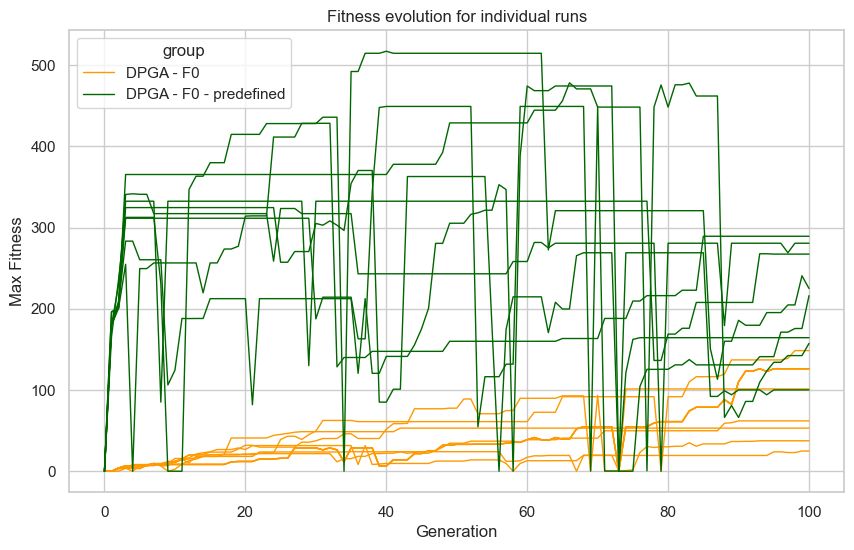

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="gen", y="max", hue="group", data=results_df, units="run_idx", estimator=None, lw=1, palette=custom_colors)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.title("Fitness evolution for individual runs")
plt.show()

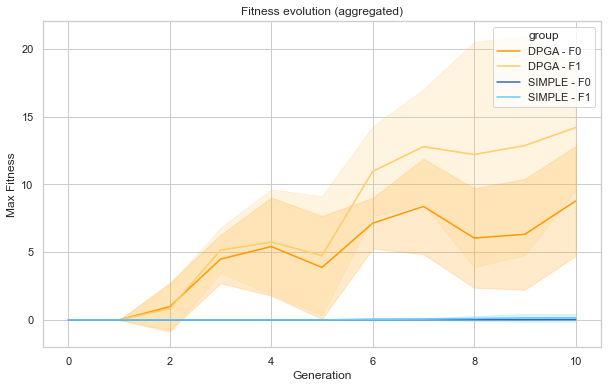

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x="gen", y="max", hue="group", data=results_df, errorbar="sd", palette=custom_colors)
plt.xlabel("Generation")
plt.ylabel("Max Fitness")
plt.title("Fitness evolution (aggregated)")
plt.show()

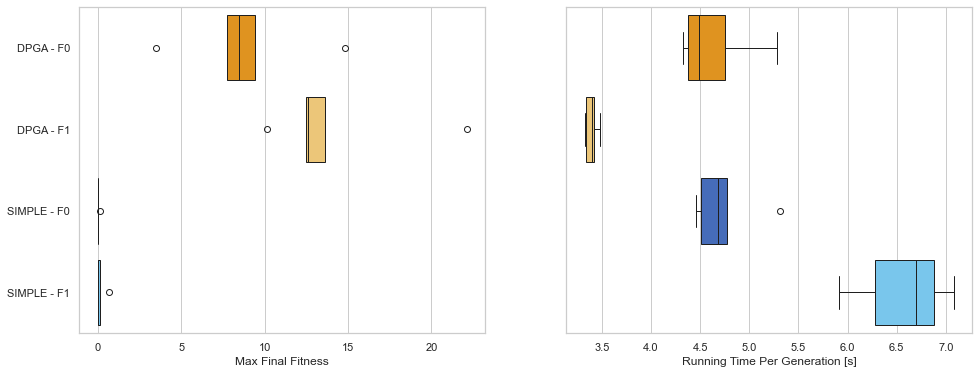

In [7]:
end_results = results_df[results_df["gen"] == results_df["gen"].max()].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(y="group", x="max", data=end_results, palette=custom_colors, hue="group", ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_xlabel("Max Final Fitness")
sns.boxplot(y="group", x="gen_time_s", data=end_results, palette=custom_colors, hue="group", ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_xlabel("Running Time Per Generation [s]")
plt.show()